In [1]:
import atoti as tt
import pandas as pd
import numpy as np

In [2]:
cars_us = pd.read_csv('./cars_us2.csv')
cust_info = pd.read_csv('./cust_info2.csv')

In [5]:
cust_info.head()

,customer_id,sex,age,job,city,state
0,80827757,F,77,Careers information officer,Briantown,Maine
1,33384689,M,67,"Sound technician, broadcasting/film/video",Susanberg,Idaho
2,73752684,M,19,Commercial art gallery manager,Savannahberg,Utah
3,70937572,M,64,Planning and development surveyor,Lake Nicholasmouth,Idaho
4,8257192,M,83,"Nurse, adult",New Eugenefort,Texas


In [6]:
cars_us.head()

,customer_id,brand,model,body-type,transmission,fuel,color,date_of_purchase,price
0,80827757,BMW,X7,Sedan,CVT,Hybrid,Blue,2018-04-30,85895
1,33384689,BMW,X4,Hatchback,Automatic,Gasoline,Lime,2019-05-07,58485
2,73752684,BMW,6-Series,SAV,Automatic,Gasoline,White,2018-09-19,85495
3,70937572,Mercedes-Benz,GLC/GLK-Class,Roadsters,Manual,Gasoline,White,2019-04-27,63350
4,8257192,BMW,7-Series,Cabriolets,Automatic,Gasoline,Navy,2018-12-27,157800


In [7]:
cars_us['year'] = pd.DatetimeIndex(cars_us['date_of_purchase']).year

In [8]:
cars_us.loc[cars_us['customer_id'] == 15004]

,customer_id,brand,model,body-type,transmission,fuel,color,date_of_purchase,price,year
1203874,15004,Mercedes-Benz,E / CLS-Class,Roadsters,Automatic,Gasoline,Navy,2019-12-30,176850,2019


In [9]:
from atoti.config import create_config

config = create_config(metadata_db="./metadata.db")
session = tt.create_session(config=config)

session.load_all_data()

In [10]:
cust_store = session.read_pandas(
    cust_info,
    # These are the DataFrame's columns that make each row unique
    keys=["customer_id"],
    store_name="customers"
)
cust_store.head()

,sex,age,job,city,state
customer_id,,,,,
30477841,F,45,Heritage manager,New Alexishaven,Wyoming
61300958,M,26,Clinical research associate,Maryburgh,Georgia
75056643,M,70,Equality and diversity officer,Melanieview,Michigan
80827757,F,77,Careers information officer,Briantown,Maine
72675922,F,63,Secretary/administrator,West Emilyside,Alabama


In [11]:
cars = session.read_pandas(
    cars_us,
    keys=["customer_id"],
    store_name="cars", types={"price": tt.type.DOUBLE}
)

cars.head()

,brand,model,body-type,transmission,fuel,color,date_of_purchase,price,year
customer_id,,,,,,,,,
58234303,Mercedes-Benz,AMG GT,SUV,CVT,Gasoline,Fuchsia,2018-03-13,87010.0,2018
62153829,BMW,X4,Hatchback,Automatic,Hybrid,Teal,2018-03-28,58485.0,2018
55367998,Mercedes-Benz,GLA-Class,Sedan,Manual,Gasoline,Black,2019-06-17,45380.0,2019
64843650,BMW,X3,Sedan,CVT,Gasoline,Fuchsia,2019-10-05,76095.0,2019
40257785,BMW,5-Series,Sedan,Automatic,Gasoline,Blue,2018-05-16,54200.0,2018


In [12]:
cars.join(cust_store)

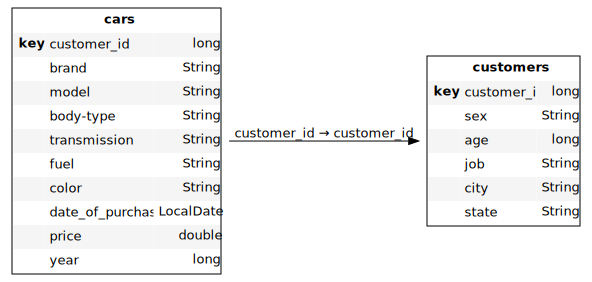

In [13]:
cube = session.create_cube(cars, name="cars")
cube.schema

In [14]:
m = cube.measures
h = cube.hierarchies
lvl = cube.levels

In [16]:
tt.experimental.create_date_hierarchy(
    "Date",
    cube,
    cars["date_of_purchase"],
    levels={"Year": "YYYY", "Quarter": "QQQ", "Month": "MM"},
)

Now, we have the cube with the Yeat Quarter and months as level, are ready to drill down and do the slice and dice along the varioud axis.

# 1. Number of cars being sold:
We can create a pivot table for the total numbers of cars being sold along with their value which can be drilled down to a month level.

In [28]:
session.visualize("How many cars are sold")

Open the notebook in JupyterLab with the atoti extension installed and enabled to start editing this widget.

## Let us look at the aggreagted cars sold by:
1. Color and Body Type
2.Body type and Year
3. Statewise Yearly Sales

In [35]:
session.visualize("car_color_type")

Open the notebook in JupyterLab with the atoti extension installed and enabled to start editing this widget.

In [39]:
session.visualize("body_type_year")

Open the notebook in JupyterLab with the atoti extension installed and enabled to start editing this widget.

In [43]:
session.visualize("StateWise_yearly_Sales")

Open the notebook in JupyterLab with the atoti extension installed and enabled to start editing this widget.

Let create a dashboard from the above widgets

In [46]:
session.url + "#/dashboard/12f"

'http://localhost:57276#/dashboard/12f'

# Dashboard 2:

Splitting on Transmission, Fuel type and Brand 

In [55]:
session.visualize("units_sold")

Open the notebook in JupyterLab with the atoti extension installed and enabled to start editing this widget.

In [68]:
session.visualize("monthly_sale_unit")

Open the notebook in JupyterLab with the atoti extension installed and enabled to start editing this widget.

In [59]:
session.visualize("monthly_sales_value")

Open the notebook in JupyterLab with the atoti extension installed and enabled to start editing this widget.

In [67]:
# let us summariw=ze this information in another dashboard
session.url + "#/dashboard/c34"

'http://localhost:57276#/dashboard/c34'

# Customer Level Dashboard 

Here we se the behaviour of customers by age, proffession, State etc.

In [66]:
# We will only do it if it makes business sense